# ORIE 5355/INFO 5370 HW 3: Algorithmic Pricing

 - Name: Kristen Flaherty
 - Net-id: kf293
 - Date: October 19, 2021
 - Late days used for this assignment: N/a
 - Total late days used (counting this assignment): 5
 - People with whom you discussed this assignment: Heisu and Hayden

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/1SxoC4YoBhUQiwPP7 and include the survey completion code below.

### Question 0 [2 points]
<font color='blue'> Survey completion code: hw3_2021xyz

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2021/assignments/). 

# Conceptual component [6 points]

Please complete the following pricing ethics scenario questionaire: https://forms.gle/DK4djayEar2ZX92y6, and include the survey completion code below. **We will discuss these issues in class on either 10/18 or 10/20 (Exact date to be announced). You must complete the questionaire before the day of that class, even if you turn in the rest of the homework later. The questionaire will close the morning of the class that we discuss these issues.**

<font color='blue'> Survey completion code: 

hw3_pricingethics_2021

<font color='blue'> Survey completion code: Based on the first letter of your first name, explain your answers to the following questions, in at most three sentences each.

First letter A-C: 1, 6, 11, 16

First letter D-H: 2, 7, 12, 17

First letter I-M: 3, 8, 13, 18

First letter N-S: 4, 9, 14, 19

First letter T-Z: 5, 10, 15, 20


<font color='blue'> Be prepared to discuss your answers to at least these questions in class (I might randomly call on people), but you should also be willing/able to discuss your answers to other questions. 

**#3  A company is making a small profit. It is located in a community experiencing a recession with substantial unemployment but no inflation. There are many workers anxious to work at the company. The company decides to decrease wages and salaries 7% this year.**

Acceptable because:
- Given high unemployment rate, the company is lacking money/resources to sufficiently take on more employees at their current salary and wage rate. High demand to work at this company means that the company can hire more people, which might help to minimize unemployment in the community. But, their employment comes at a cost. They must offer lower wages/salaries in order to continue making their profits, but also bring more people on board. 
- Companies need to operate on some sort of profit, however small. Aiming to make a profit shouldn't be unfair due to competition in the market and for pure sustainability of the company and its product offerings.
- The company is making a fair tradeoff to offer more opportunities to community members while also ensuring that they remain a viable business.

**#8 A grocery chain has stores in many communities. Most of them face competition from other groceries. In one community the chain has no competition. Although its costs and volume of sales are the same there as elsewhere, the chain sets prices that average 5 percent higher than in other communities. The community without competition is not any different socio-economically than the other communities.**

Acceptable because:
- Since there is no competition, the chain could be testing out different item prices to see if they can make more of a profit on them, and possibly roll them out to other stores. They can do this in this certain community only because they have no competition, so it is a perfect environment to test out different prices. Additionally, 5 % is not that much of a price increase, highlighting that the cost increase will not severely affect community members, especially if they are not any different socio-economically than people in other communities. This is a fair tactic for the chain to do in order to evaluate demands for items at new prices.

**#13 An algorithm is being used to price an essential item (for example, school supplies) for an online retailer. It learns that people from a certain neighborhood (via their IP address) are willing to pay higher prices, and so it sets higher prices for them. The neighborhood is a socioeconomially disadvantaged neighborhood.**

Unfair because:
- As is, socioeconomic status is not a variable on which this algorithm decides to set higher prices or not. Socioeconomic status should be a moderator for whether or not the algorithm should set prices higher/lower based on what prices people in that neighbhorhood are willing to pay, especially for essential goods. The problem isn't that the algorithm is not pricing things fairly, it's that socioeconomic status needs to be a factor when choosing to price essential items differently than past prices.

**#18 On Uber/Lyft, drivers have to drive longer to pick up the passengers in certain suburbs or neighborhoods, because they tend to be farther away. Is it acceptable for them to charge more to passengers from these neighborhoods, if these neighborhoods tend to be socioeconomically disadvantaged historically?**

Acceptable because:
- Ubers/Lyfts are not an essential good, so fares need to be higher if the driver is willing to go a longer distance to pick up someone farther away. Even if this passenger is from a socioeconomically disadvantaged neighbhoorhood, the cost per distance would be the same if the passenger was from a socioeconomically advantaged neighboorhood equally as far away from the driver's starting point. This differs from the above example because ride sharing apps are a luxury good, not an essential good (as school supplies were above).

# Programming component

## Helper code

In [1]:
import numpy as np
import pandas as pd
import os, sys, math
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('HW3_data_train.csv')
test_demand_curve = pd.read_csv('test_demand.csv')

In [3]:
df_train.head()

,Location,Income,Offered price,Purchased
0,Africa,10.38,3.16,False
1,Europe,26.33,3.47,True
2,Europe,24.06,3.78,True
3,Africa,16.18,3.74,False
4,Asia Pacific,13.73,4.75,False


In [4]:
test_demand_curve.head()

,Price_bin,Demand_at_price,Price_bin_left,Price_bin_right,Price_bin_mid
0,"(0.5, 0.53]",0.985075,0.500,0.530,0.5150
1,"(0.53, 0.56]",0.966102,0.530,0.560,0.5450
2,"(0.56, 0.59]",0.963768,0.560,0.590,0.5750
3,"(0.59, 0.621]",0.963235,0.590,0.621,0.6055
4,"(0.621, 0.651]",0.956522,0.621,0.651,0.6360


In [5]:
df_train.shape, test_demand_curve.shape

((4000, 4), (199, 5))

In [6]:
str_intervals = [i.replace("(","").replace("]", "").split(", ") for i in test_demand_curve['Price_bin']]
test_demand_curve['Price_bin']= [pd.Interval(float(i), float(j)) for i, j in str_intervals]

## Problem 1: Demand estimation and pricing without covariates

First, we will use the training data to construct estimates of the demand at each price without leveraging the covariates, and then use that estimated function to calculate optimal prices. 

### 1a) Naive method: empirical estimate of demand $d(p)$ at each price

<font color='blue'> Fill in the below function, that takes in a dataframe and the number of bins into which to separate the historical prices. The function should output a dataframe that has one row for each price bin, with two columns: the bin interval, and the estimated demand $d(p)$ (the fraction of potential customers who purchase at price $p$) in that bin.  
    
Use the following function to create bins:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [7]:
# # Example with 10 bins:
# df_train['bin_with_10_bins'] = pd.qcut(df_train['Offered price'],2)
# df_train.head()

For example, with 2 bins and passing in df_train to the function, you should see the following output:

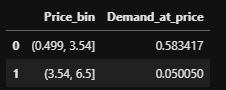

In [8]:
def create_empirical_estimate_demand_df(df2, number_of_pricing_bins):
    df = df2.copy(deep=True)
    df['bin_with_{}_bins'.format(number_of_pricing_bins)] = pd.qcut(df['Offered price'], number_of_pricing_bins)
    
    naive_estimates = pd.DataFrame()
    naive_estimates['Price_bin'] = df['bin_with_{}_bins'.format(number_of_pricing_bins)].unique()
    
    demands = []
    for price_bin in naive_estimates['Price_bin']:
        all_purchases_in_bin_d = df[df['bin_with_{}_bins'.format(number_of_pricing_bins)] == price_bin]['Purchased'].value_counts(normalize=True).to_dict()

        if True in all_purchases_in_bin_d.keys():
            fraction = all_purchases_in_bin_d[True]
            demands.append(fraction)
        else:
            demands.append(0)
    
    naive_estimates['Demand at price'] = demands
    return naive_estimates

In [9]:
empirical_df = create_empirical_estimate_demand_df(df_train, 2)
empirical_df

,Price_bin,Demand at price
0,"(0.499, 3.54]",0.583417
1,"(3.54, 6.5]",0.050050


<font color='blue'> Fill in the below function, that takes in a single price and your empirical df from the above function and outputs the prediction for the demand $d(p)$ at that price.

In [10]:
def get_prediction_empirical(empirical_df, price):
    if price in empirical_df['Price_bin'].values:
        for price_bin in range(len(empirical_df['Price_bin'].values)):
            if price in empirical_df['Price_bin'].values[price_bin]:
                return empirical_df.at[price_bin, 'Demand at price']
    else:
        return 0.0

In [11]:
prices_to_predict = np.linspace(min(df_train['Offered price']), max(df_train['Offered price']), 200)

<font color='blue'> Plot in a single figure the outputs of your function as a line plot -- where the X axis corresponds to prices in `prices_to_predict` and the Y axis the predicted Demand at that price -- for the following three inputs to the function:
    
    1. the dataframe is the first 100 rows of df_train, with 10 bins.
    
    2. the dataframe is the first 500 rows of df_train, with 10 bins.
    
    3. the dataframe is all the rows of df_train, with 10 bins.

<font color='blue'> In the same figure, include the "true" test-time demand curve, `test_demand_curve`. 

In [12]:
price_predictions = [[], 
                     [], 
                     []]

dftrain_top100_10bins = create_empirical_estimate_demand_df(df_train[:100], 10)
dftrain_top500_10bins = create_empirical_estimate_demand_df(df_train[:500], 10)
dftrain_all_10bins = create_empirical_estimate_demand_df(df_train, 10)

for price in prices_to_predict:
    
    price_pred_100 = get_prediction_empirical(dftrain_top100_10bins, price)
    price_predictions[0].append(price_pred_100)

    
    price_pred_500 = get_prediction_empirical(dftrain_top500_10bins, price)
    price_predictions[1].append(price_pred_500)
    
    
    price_pred_all = get_prediction_empirical(dftrain_all_10bins, price)
    price_predictions[2].append(price_pred_all)

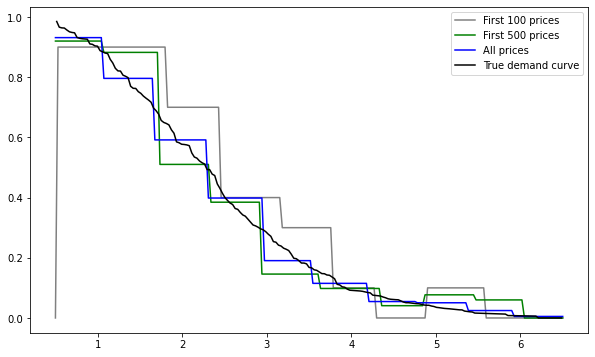

In [13]:
plt.figure(figsize=(10,6))
plt.plot(prices_to_predict, price_predictions[0], c='grey', label='First 100 prices')
plt.plot(prices_to_predict, price_predictions[1], c='g', label='First 500 prices')
plt.plot(prices_to_predict, price_predictions[2], c='b', label='All prices')
plt.plot(test_demand_curve['Price_bin_mid'], test_demand_curve['Demand_at_price'], c='k', label='True demand curve')
plt.legend()
plt.show()

<font color='blue'> Do the same plot, except now you're using 50 bins for each of the three data frames.

In [14]:
price_predictions_50 = [[], 
                     [], 
                     []]

dftrain_top100_50bins = create_empirical_estimate_demand_df(df_train[:100], 50)
dftrain_top500_50bins = create_empirical_estimate_demand_df(df_train[:500], 50)
dftrain_all_50bins = create_empirical_estimate_demand_df(df_train, 50)

for price in prices_to_predict:
    
    price_pred_100 = get_prediction_empirical(dftrain_top100_50bins, price)
    price_predictions_50[0].append(price_pred_100)

    
    price_pred_500 = get_prediction_empirical(dftrain_top500_50bins, price)
    price_predictions_50[1].append(price_pred_500)
    
    
    price_pred_all = get_prediction_empirical(dftrain_all_50bins, price)
    price_predictions_50[2].append(price_pred_all)

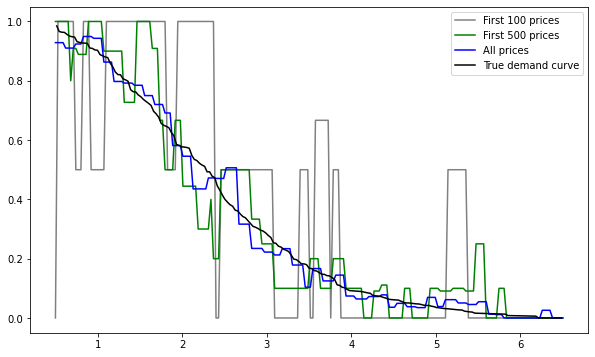

In [15]:
plt.figure(figsize=(10,6))
plt.plot(prices_to_predict, price_predictions_50[0], c='grey', label='First 100 prices')
plt.plot(prices_to_predict, price_predictions_50[1], c='g', label='First 500 prices')
plt.plot(prices_to_predict, price_predictions_50[2], c='b', label='All prices')
plt.plot(test_demand_curve['Price_bin_mid'], test_demand_curve['Demand_at_price'], c='k', label='True demand curve')
plt.legend()
plt.show()

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using more data and more bins?

Using more data with more bins shows a more accurate estimate of the true demand curve.

### 1b) Demand estimation using logistic regression

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should just have two coefficients: one for the intercept, and one for the price. The function takes in a dataframe that you will use as your training data for your model, and should return your fitted model. 

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
def fit_logistic_regression_demand_just_on_price(df, df_all):
    prices = []
    for price in df_all['Offered price'][:500]:
        for price_bin in df['Price_bin']:
            if price in price_bin:
                prices.append(price)
#             else:
#                 prices.append(0.0)
    if len(prices) != 500:
        for i in range(500-len(prices)):
            prices.append(0)
    prices = np.array(prices).reshape(-1,1)
#     prices = np.array(df['Offered price']).reshape(-1, 1)
    demands = df_all['Purchased'][:500]
        
    model = LogisticRegression(fit_intercept=True)
    
    return model.fit(prices, demands)

<font color='blue'> Fill in the below function, that takes in a single price and your trained model and outputs the prediction for the demand $d(p)$ at that price.

In [18]:
def get_prediction_logistic(fitted_model, price):
    price = np.array(price).reshape(-1, 1)
    output = fitted_model.predict_proba(price)
    return output[0][1]


<font color='blue'> For each of the three training dataframes as in part A, fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function. Generate the same lineplot as above. Also include the "true" test-time demand curve, `test_demand_curve`. 

In [19]:
dftrain_top100_50bins.shape

(50, 2)

In [20]:
all_dfs = [dftrain_top100_50bins, dftrain_top500_50bins, dftrain_all_50bins]

all_preds = [[],
            [],
            []]

for i, df in enumerate(all_dfs):
    model = fit_logistic_regression_demand_just_on_price(df, df_train)
    for price in prices_to_predict:
        all_preds[i].append(get_prediction_logistic(model, price))

/Users/kristenflaherty/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kristenflaherty/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kristenflaherty/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


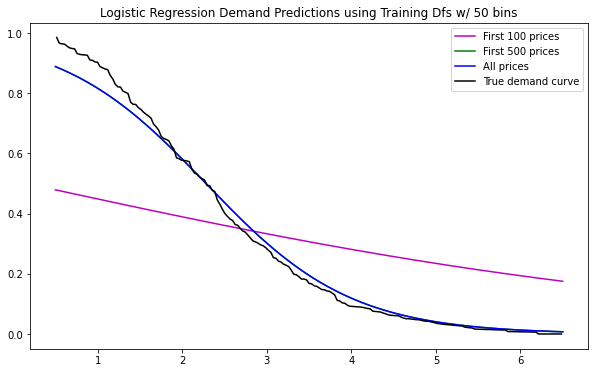

In [21]:
plt.figure(figsize=(10,6))
plt.plot(prices_to_predict, all_preds[0], c='m', label='First 100 prices')
plt.plot(prices_to_predict, all_preds[1], c='g', label='First 500 prices')
plt.plot(prices_to_predict, all_preds[2], c='b', label='All prices')
plt.plot(test_demand_curve['Price_bin_mid'], test_demand_curve['Demand_at_price'], c='k', label='True demand curve')
plt.title('Logistic Regression Demand Predictions using Training Dfs w/ 50 bins')
plt.legend()
plt.show()

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using logistic regression instead of the empirical distribution? 

Logistic regression outputs more accurate predictions for the demand at certain prices than the empirical distribution. Here, logistic regression model learns the behavior of the demand as price changes, which minimizes the moderating effect of the amount of data used (first 100 rows vs first 500 rows, vs all rows) on the predicted demand. 

### 1c) Optimal pricing using your demand estimates

<font color='blue'> Fill in the following function that takes in two lists: a list of prices, and a list of predicted demand d(p) at that price. The function outputs the revenue maximizing price given the data and the corresponding revenue. You may use a "brute force" technique, that loops through all the possible prices and calculates the revenue using that price. 

In [22]:
def get_revenue_maximizing_price_and_revenue(price_options, demand_predictions):
    exp_revenues = []
    for i in range(len(price_options)):
        rev = 0
        for j in range(len(demand_predictions)):
            if i == j:
                rev = price_options[i] * demand_predictions[j]
        exp_revenues.append(rev)
    
    final_revenue = max(exp_revenues)
    max_price_loc = exp_revenues.index(final_revenue)
    return round(price_options[max_price_loc], 3), final_revenue

<font color='blue'> Print out the optimal price and the predicted optimal revenue from the predictions for your naive and logistic models, using 100 rows and all the data, each. 

In [23]:
#Naive model
naive_demand_predictions = price_predictions_50[0]

max_price_naive, max_revenue_naive = get_revenue_maximizing_price_and_revenue(prices_to_predict, naive_demand_predictions)

In [24]:
print('Naive model:')
print('______________________________\n')
print('\tOptimal Price = $', max_price_naive)
print('\tPredicted Optimal Revenue = $', max_revenue_naive)

Naive model:
______________________________

	Optimal Price = $ 5.354
	Predicted Optimal Revenue = $ 2.6771356783919598


In [25]:
#Logistic model
log_demand_predictions = all_preds[0]

max_price_log, max_revenue_log = get_revenue_maximizing_price_and_revenue(prices_to_predict, log_demand_predictions)

In [26]:
print('Logistic model:')
print('______________________________\n')
print('\tOptimal Price = $', max_price_log)
print('\tPredicted Optimal Revenue = $', max_revenue_log)

Logistic model:
______________________________

	Optimal Price = $ 5.264
	Predicted Optimal Revenue = $ 1.174299344236967


<font color='blue'> Now, we're going to use the "true" test-time demand curve, `test_demand_curve`. For each of the above predicted optimal prices, calculate the revenue resulting from that price used on the true demand curve. Also print out the true optimal price and corresponding revenue for that curve.  

In [27]:
naive_demand = 0
for row, price_bin in enumerate(test_demand_curve['Price_bin']):
    if max_price_naive in price_bin:
        naive_demand = test_demand_curve.at[row, 'Demand_at_price']

In [28]:
log_demand = 0
for row, price_bin in enumerate(test_demand_curve['Price_bin']):
    if max_price_log in price_bin:
        log_demand = test_demand_curve.at[row, 'Demand_at_price']

In [29]:
print('True curve:')
print('______________________________\n')

print('Naive model:')
print('\tOptimal Price = $', max_price_naive)
print('\tTrue Optimal Revenue = $', round(max_price_naive * naive_demand, 3))
print('\n')
print('Logistic model:')
print('\tOptimal Price = $', max_price_log)
print('\tTrue Optimal Revenue = $', round(max_price_log * log_demand, 3))

True curve:
______________________________

Naive model:
	Optimal Price = $ 5.354
	True Optimal Revenue = $ 0.123


Logistic model:
	Optimal Price = $ 5.264
	True Optimal Revenue = $ 0.146


<font color='blue'> How do your estimates compare to the actual revenue? Discuss in no more than 3 sentences. 

My revenue estimates were innaccurate and too high. True revenue was much lower than what I predicted with the naive model and the logistic model.

# Problem 2: Demand estimation and pricing with covariates 

Now, we are going to ask you to do personalized pricing, based on just a two binarized covariates. 

First, take `df_train` and create a new column for "low" and "high" wealth, based on if the income level is above or below the median income level. Second, create a new column for Location: `1` if the location is either America, and `0` if the location is anything else.

For this section, we will use all the df_train data, as opposed to just the first few rows.

In [30]:
median = df_train['Income'].median()
df_train['Low Wealth'] = 0
df_train['High Wealth'] = 0

for row in range(df_train.shape[0]):
    if df_train.at[row, 'Income'] <= median:
        df_train.at[row, 'Low Wealth'] = 0
    else:
        df_train.at[row, 'High Wealth'] = 1

In [31]:
df_train['America'] = 0
df_train['Not America'] = 0

for row in range(df_train.shape[0]):
    if df_train.at[row, 'Location'] == 'America':
        df_train.at[row, 'America'] = 1
    else:
        df_train.at[row, 'Not America'] = 0

### 2a) Demand estimation

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should now have more coefficients than before: 1 for each covariate, and any interactions (including interactions between price and covariates) that you wish to add. If you add more interactions, you may wish to add regularization. 

In [32]:
def fit_logistic_regression_demand_with_covariates(df, covariates):

    X = df[covariates]

    y = df['Purchased']
    
    logreg = LogisticRegression(C = .5, solver='liblinear')
    model = logreg.fit(X, y)

    return model

<font color='blue'> Fill in the below function, that takes in a single price, covariates, and your trained model, and outputs the prediction for the demand $d(p)$ at that price. For example, one of the covariate inputs to the function can be `['NotAmerica', 'LowWealth']`.

In [33]:
def get_prediction_logistic(fitted_model, price, covariates, df):
    
    #to solve for rouding and checking issues within df train offered price
    if price == 2.7613065326633164 or price == 2.7311557788944723:
        new_data = df[df['Offered price'] == round(price, 1)]
        X = new_data[covariates]
    else:
        new_data = df[df['Offered price'] == round(price, 2)]
        X = new_data[covariates]
    
    predictions = fitted_model.predict_proba(X)
    
    #all probabilities that it will be purchased - take the average to get the demand??
    return np.mean(predictions[:, 1])

In [34]:
test_demand_curve_America_HighWealth = pd.read_csv('test_demand_America_HighWealth.csv')
test_demand_curve_NotAmerica_HighWealth = pd.read_csv('test_demand_NotAmerica_HighWealth.csv')
test_demand_curve_America_LowWealth = pd.read_csv('test_demand_America_LowWealth.csv')
test_demand_curve_NotAmerica_LowWealth = pd.read_csv('test_demand_NotAmerica_LowWealth.csv')

<font color='blue'> Fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function and each unique covariate combination.
    
<font color='blue'> For each covariate combination, generate the same lineplot as in 1a and 1b (separately for each covariate combination). Also include the "true" test-time demand curve for the appropriate covariate combination (For example, `test_demand_NotAmerica_HighWealth`).

In [35]:
covar_predictions = [[],
                    [],
                    [],
                    []]

covar_combos = [['Offered price', 'America', 'High Wealth'],
              ['Offered price', 'America', 'Low Wealth'],
              ['Offered price', 'Not America', 'High Wealth',],
              ['Offered price', 'Not America', 'Low Wealth']]

for j, pair in enumerate(covar_combos):
    model = fit_logistic_regression_demand_with_covariates(df_train, pair)
    for price in prices_to_predict:
#         get_prediction_logistic(model, price, pair, df_train)
        prediction = get_prediction_logistic(model, price, pair, df_train)
        covar_predictions[j].append(prediction)

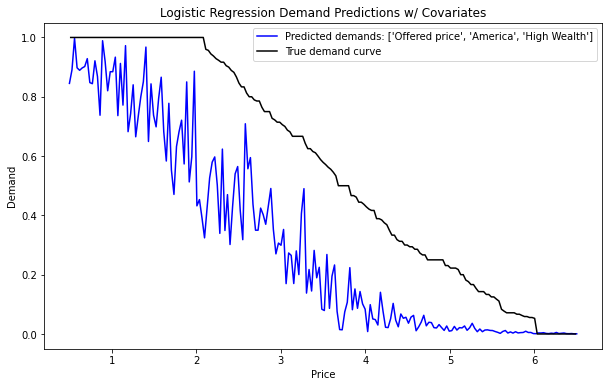

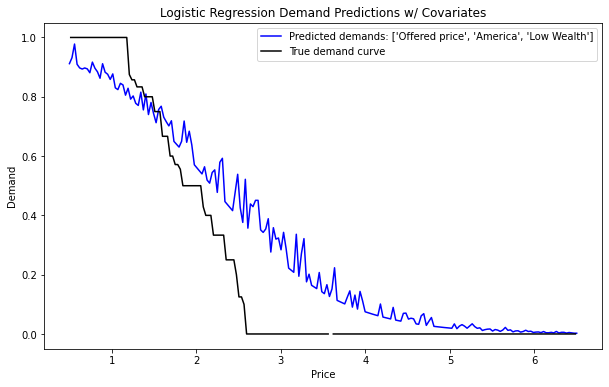

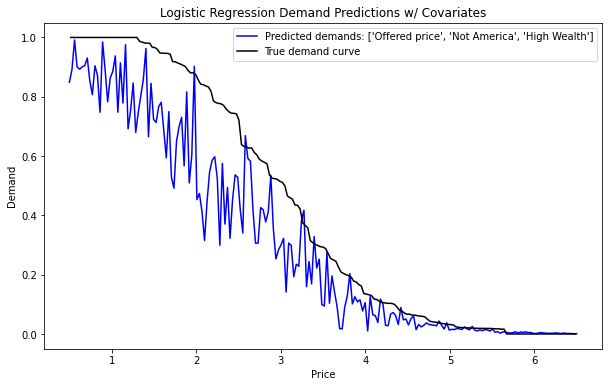

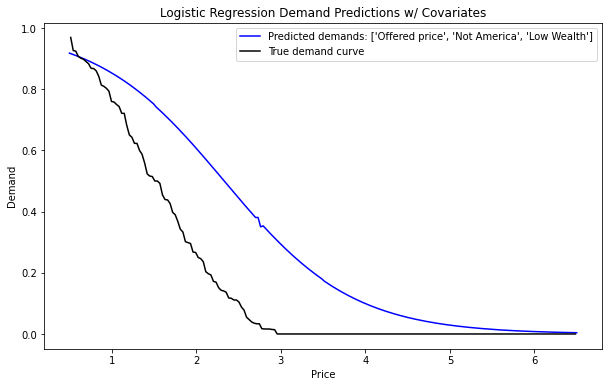

In [36]:
true_demands = [test_demand_curve_America_HighWealth,
               test_demand_curve_America_LowWealth,
                test_demand_curve_NotAmerica_HighWealth,
               test_demand_curve_NotAmerica_LowWealth]

for i, curve in enumerate(true_demands):
    plt.figure(figsize=(10,6))
    plt.plot(prices_to_predict, covar_predictions[i], c='b', label='Predicted demands: {}'.format(covar_combos[i]))
    plt.plot(curve['Price_bin_mid'], curve['Demand_at_price'], c='k', label='True demand curve')
    plt.title('Logistic Regression Demand Predictions w/ Covariates')
    plt.xlabel('Price')
    plt.ylabel('Demand')
    plt.legend()
    plt.show()

### 2b) Pricing

<font color='blue'> Now, use your code from 1c to output predicted optimal prices, predicted revenue, and and actual revenue using the test data curve, for each covariate combination. 

In [37]:
optimal_prices = []
for i, preds in enumerate(covar_predictions):
    max_price_log_covar, max_revenue_log_covar = get_revenue_maximizing_price_and_revenue(prices_to_predict, preds)
    optimal_prices.append(max_price_log_covar)
    print('Logistic model w/ Covars: {}'.format(covar_combos[i]))
    print('______________________________\n')
    print('\tOptimal Price = $', max_price_log_covar)
    print('\tPredicted Optimal Revenue = $', max_revenue_log_covar)
    print('\n\n')

Logistic model w/ Covars: ['Offered price', 'America', 'High Wealth']
______________________________

	Optimal Price = $ 2.58
	Predicted Optimal Revenue = $ 1.8295021166307668



Logistic model w/ Covars: ['Offered price', 'America', 'Low Wealth']
______________________________

	Optimal Price = $ 2.309
	Predicted Optimal Revenue = $ 1.3681227857120213



Logistic model w/ Covars: ['Offered price', 'Not America', 'High Wealth']
______________________________

	Optimal Price = $ 1.977
	Predicted Optimal Revenue = $ 1.7850841472402765



Logistic model w/ Covars: ['Offered price', 'Not America', 'Low Wealth']
______________________________

	Optimal Price = $ 1.977
	Predicted Optimal Revenue = $ 1.2139203597936925





In [38]:
for curve in true_demands:
    str_intervals = [i.replace("(","").replace("]", "").split(", ") for i in curve['Price_bin']]
    curve['Price_bin']= [pd.Interval(float(i), float(j)) for i, j in str_intervals]

In [39]:
demand_covars = []

for i, true_demand in enumerate(true_demands):
    price = optimal_prices[i]
    for row, price_bin in enumerate(true_demand['Price_bin']):
        if price in price_bin:
            demand_covars.append(true_demand.at[row, 'Demand_at_price'])

In [40]:
for i, pair in enumerate(covar_combos):
    print('Logistic model w/ Covars: {}'.format(pair))
    print('______________________________\n')
    print('\tOptimal Price = $', optimal_prices[i])
    print('\tTrue Optimal Revenue = $', optimal_prices[i] * demand_covars[i])
    print('\n\n')

Logistic model w/ Covars: ['Offered price', 'America', 'High Wealth']
______________________________

	Optimal Price = $ 2.58
	True Optimal Revenue = $ 2.1500000000000004



Logistic model w/ Covars: ['Offered price', 'America', 'Low Wealth']
______________________________

	Optimal Price = $ 2.309
	True Optimal Revenue = $ 0.7696666666666667



Logistic model w/ Covars: ['Offered price', 'Not America', 'High Wealth']
______________________________

	Optimal Price = $ 1.977
	True Optimal Revenue = $ 1.7409402985074627



Logistic model w/ Covars: ['Offered price', 'Not America', 'Low Wealth']
______________________________

	Optimal Price = $ 1.977
	True Optimal Revenue = $ 0.529056338028169





<font color='blue'> Suppose each of the 4 covariate combinations make up an equal part of the population. What would be the resulting revenue achieved at test time using your above prices?

In [41]:
demand_covars_equal = [.25]*4

for i, pair in enumerate(covar_combos):
    print('Logistic model w/ Covars: {}'.format(pair))
    print('______________________________\n')
    print('\tOptimal Price = $', optimal_prices[i])
    print('\tTrue Optimal Revenue = $', optimal_prices[i] * demand_covars_equal[i])
    print('\n\n')

Logistic model w/ Covars: ['Offered price', 'America', 'High Wealth']
______________________________

	Optimal Price = $ 2.58
	True Optimal Revenue = $ 0.645



Logistic model w/ Covars: ['Offered price', 'America', 'Low Wealth']
______________________________

	Optimal Price = $ 2.309
	True Optimal Revenue = $ 0.57725



Logistic model w/ Covars: ['Offered price', 'Not America', 'High Wealth']
______________________________

	Optimal Price = $ 1.977
	True Optimal Revenue = $ 0.49425



Logistic model w/ Covars: ['Offered price', 'Not America', 'Low Wealth']
______________________________

	Optimal Price = $ 1.977
	True Optimal Revenue = $ 0.49425





<font color='blue'> Comment on your outputs in no more than 3 sentences. What is the effect of using different prices for differerent covariate groups?

My demand and revenue predictions using multivariate logistic regression were more in ballpark of the true demand and revenue predictions as opposed to only using a single covariate in my previous model in part 1. When using different prices for different covariate groups, we predict a more accurate demand and thus predicted revenue, and are better able to determine wehther or not a potential user population will purhcase an item set at X price given the population's unique set of characteristics.

# Problem 3: Pricing under capacity constraints

Now, we are going to build up to implementing the Bellman equation approach discussed in class, to price a single copy of an item to be sold over $T$ time periods. For simplicity, we will use `test_demand_curve` as $d(p)$. 

In [42]:
price_options = list(test_demand_curve.Price_bin_mid)
demand_predictions = list(test_demand_curve.Demand_at_price)

### 3a) Implementing one step of the Bellman equation

Recall the "Bellman equation" taught in class. Suppose we have 1 copy of the item at time $t$. Then, my expected revenue given I price the item at $p_t$ is:
$$ V_t = d(p_t)p_t + (1 - d(p_t))V_{t+1}$$

<font color='blue'> Implement the following function that returns optimal price $p_t$ and the resulting value $V_t$, given the demand curve and $V_{t+1}$. 

In [43]:
def get_single_step_revenue_maximizing_price_and_revenue(Vtplus1, price_options, demand_predictions):
    pt = 0
    Vt = 0
    for i, price in enumerate(price_options):
        exp_revenue = (demand_predictions[i]*price) + ((1-demand_predictions[i])*Vtplus1)
        if exp_revenue > Vt:
            Vt = exp_revenue
            pt = price
    return (pt, Vt)

### 3b) Calculating prices over time


<font color='blue'> Implement the following function that returns a list (of length $T$) of optimal prices for each time period, and a expected revenue number for those prices.
    
Hint: your function should loop through each time step, _starting_ at time $t=T-1$ (the last time period, since the first time period is time $t=0$). Each iteration of the loop should call the function from part 3a. Recall that we can define $V_T = 0$, since even if the item is unsold at time $T$, we have finished trying to sell it.

In [44]:
def get_prices_over_time_and_expected_revenue(prices, demand_predictions, T):
    prices_and_revenues = []
    
    Vtplus1=0
    
    for time in reversed(range(T)):
#     print(time)
        new_ptVt_tup = get_single_step_revenue_maximizing_price_and_revenue(Vtplus1, prices, demand_predictions)
        prices_and_revenues.append(new_ptVt_tup)
        Vtplus1 = new_ptVt_tup[1]
    return prices_and_revenues

<font color='blue'> Plot a line plot for your optimal prices over time when $T=100$ and $T=10$. Also print out the expected revenue using these prices and for each $T$. 

In [45]:
optimal_prices_10 = [tup[0] for tup in get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 10)][::-1]
optimal_rev_10 = [tup[1] for tup in get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 10)][::-1]
optimal_rev_100 = [tup[1] for tup in get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 100)][::-1]
optimal_prices_100 = [tup[0] for tup in get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 100)][::-1]

In [57]:
get_single_step_revenue_maximizing_price_and_revenue(0, p, d1)

(3, 1.7999999999999998)

In [53]:
p=[1, 2, 3, 4]
d1 = [1, .8, .6, .4]
d2 = [.75, .5, .25, 0]

In [60]:
get_prices_over_time_and_expected_revenue(p, d1, 2)

[(3, 1.7999999999999998), (4, 2.6799999999999997)]

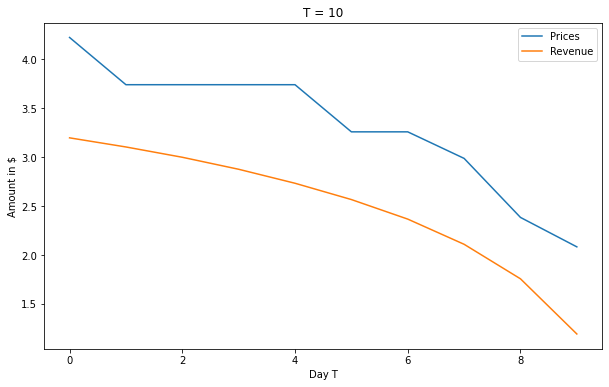

In [46]:
plt.figure(figsize=(10,6))
plt.plot(optimal_prices_10, label='Prices')
plt.plot(optimal_rev_10, label='Revenue')
plt.title('T = 10')
plt.xlabel('Day T')
plt.ylabel('Amount in $')
plt.legend()
plt.show()

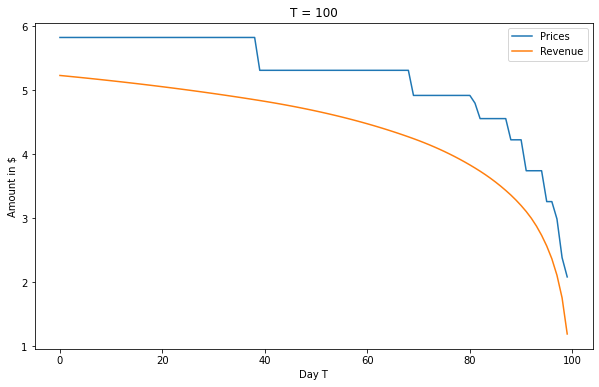

In [47]:
plt.figure(figsize=(10,6))
plt.plot(optimal_prices_100, label='Prices')
plt.plot(optimal_rev_100, label='Revenue')
plt.title('T = 100')
plt.xlabel('Day T')
plt.ylabel('Amount in $')
plt.legend()
plt.show()

### 3c) [Bonus, 3 points] Prices over time with multiple copies

<font color='blue'> Now, suppose that you have $K$ copies of the item, that you must sell over a time period $T$. Implement the two-dimensional dynamic program as discussed in class. Plot a line plot where the X axis is time as in 3b, but now you have $K$ lines where each line indicates the price at time $T$ if you have $K$ items left. 
    
Hint: As in 3a and 3b, you may find it useful to first optimize the price $p_{t,k}$ given the values $V_{t+1, k}$, $V_{t+1, k-1}$. Then, have a 2nd function that loops through $t, k$ in an appropriate order. 

In [48]:
def get_single_step_revenue_maximizing_price_and_revenue_under_capacity(prev_Vtplus1, Vtplus1, price_options, demand_predictions):
    pt = 0
    Vt = 0
    for i, price in enumerate(price_options):
        exp_revenue = (demand_predictions[i]*(price+prev_Vtplus1)) + ((1-demand_predictions[i])*Vtplus1)
        if exp_revenue > Vt:
            Vt = exp_revenue
            pt = price
    return (pt, Vt)

In [49]:
def get_prices_over_time_under_capacity(prices, demand_predictions, T, items):
    prices_new, revenues = [[0]* items for i in range(T+1)], [[0] * items for i in range(T+1)]
    
    for time in reversed(range(T)):
        for item in range(1, items):
            new_ptVt_tup = get_single_step_revenue_maximizing_price_and_revenue_under_capacity(revenues[time+1][item-1], revenues[time+1][item], prices, demand_predictions)
            prices_new[time][item] = new_ptVt_tup[0]
            revenues[time][item] = new_ptVt_tup[1]
        
    return prices_new

In [70]:
get_prices_over_time_under_capacity(p, d1, 2, 2)

[[0, 4], [0, 3], [0, 0]]

In [71]:
get_prices_over_time_under_capacity(p, d2, 2, 2)

[[0, 2], [0, 2], [0, 0]]

In [50]:
t100_k5 = get_prices_over_time_under_capacity(price_options, demand_predictions, 100, 7)

In [51]:
plots = []
for i in range(0, 6):
    plots.append([t100_k5[j][i] for j in range(len(t100_k5))])

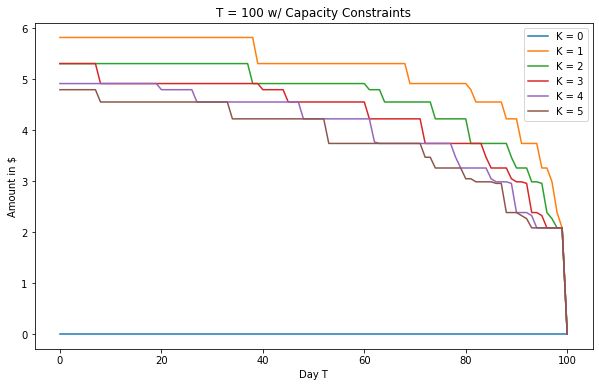

In [52]:
plt.figure(figsize=(10,6))
plt.plot(plots[0], label='K = 0')
plt.plot(plots[1], label='K = 1')
plt.plot(plots[2], label='K = 2')
plt.plot(plots[3], label='K = 3')
plt.plot(plots[4], label='K = 4')
plt.plot(plots[5], label='K = 5')
plt.title('T = 100 w/ Capacity Constraints')
plt.xlabel('Day T')
plt.ylabel('Amount in $')
plt.legend()
plt.show()